# Практическое задание 2 
## по теме: "Дискретные случайные величины. Закон распределения вероятностей. Биномиальный закон распределения. Распределение Пуассона"

**Задача 1.**

Вероятность того, что стрелок попадет в мишень, выстрелив один раз, равна 0.8. Стрелок выстрелил 100 раз. Найдите вероятность того, что стрелок попадет в цель ровно 85 раз.

Используем закон биномиального распределения для дискретных случайных величин:
$$p = C_n^kp^kq^{n-k},$$
где n = 100 - число независимых испытаний, 
    k = 85 - число попаданий в цель,
    p = 0.8 - вероятность попадания в цель,
    q = (1 - p) - вероятность промаха.

In [1]:
from math import factorial

In [2]:
# функция, считающая число сочетаний
def combinations(n, k):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

In [3]:
# функция, вычисляющая по формуле Бернулли биномиальное распределение
def binomial_distribution(n, k, p):
    return combinations(n, k) * p ** k * (1 - p) ** (n - k)

In [4]:
print(f'Вероятность того, что стрелок выстрелит 100 раз и попадет в цель 85 раз равна {binomial_distribution(100, 85, 0.8):.2%}')

Вероятность того, что стрелок выстрелит 100 раз и попадет в цель 85 раз равна 4.81%


**Задача 2.**

Вероятность того, что лампочка перегорит в течение первого дня эксплуатации, равна 0.0004. В жилом комплексе после ремонта в один день включили 5000 новых лампочек. Какова вероятность, что ни одна из них не перегорит в первый день?
Какова вероятность, что перегорят ровно две?

В данном случае проводится большое число испытаний, а вероятность того, что лампочка перегорит в первый день мала. Следовательно, справедлива формула Пуассона:
$$P_m \approx \frac{\lambda^m}{m!}e^{-\lambda},$$
где λ = np, n = 5000 - число испытаний, p = 0.0004 - вероятность того, что лампочка перегорит в первый день, m = 0 (m = 2) - сколько лампочек перегорело в первый день.

In [5]:
import numpy as np

In [6]:
# функция, вычисляющая вероятность по формуле Пуассона
def poisson (n, p, m):
    l = n * p
    return l ** m / factorial(m) * np.exp(-l)

In [7]:
print(f'Вероятность того, что ни одна лампочка не перегорит в первый день равна {poisson(5000, 0.0004, 0):.2%}')

Вероятность того, что ни одна лампочка не перегорит в первый день равна 13.53%


In [8]:
print(f'Вероятность того, что две лампочки перегорят в первый день равна {poisson(5000, 0.0004, 2):.2%}')

Вероятность того, что две лампочки перегорят в первый день равна 27.07%


In [9]:
import matplotlib.pyplot as plt

In [10]:
x = range(0, 11)
y = []
for el in range(0, 11):
    y.append(poisson(5000, 0.0004, el))

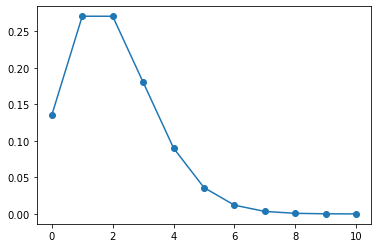

In [11]:
plt.plot(x, y, marker='o')

**Задача 3.**

Монету подбросили 144 раза. Какова вероятность, что орел выпадет ровно 70 раз?

Решение аналогично задаче 1:

In [12]:
print(f'Вероятность того, что орел выпадет 70 раз при 144 подбрасываниях равна {binomial_distribution(144, 70, 0.5):.2%}')

Вероятность того, что орел выпадет 70 раз при 144 подбрасываниях равна 6.28%


**Задача 4.**

В первом ящике находится 10 мячей, из которых 7 - белые. Во втором ящике - 11 мячей, из которых 9 белых. Из каждого ящика вытаскивают случайным образом по два мяча. Какова вероятность того, что все мячи белые? Какова вероятность того, что ровно два мяча белые? Какова вероятность того, что хотя бы один мяч белый?

Число способов вынуть 2 мяча из первого ящика равно числу сочетаний:

In [13]:
combinations(10, 2)

45

Число способов вынуть 2 мяча из второго ящика равно:

In [14]:
combinations(11, 2)

55

Всего способов:

In [15]:
45 * 55

2475

**а)** Найдем вероятность того, что все вынутые мячи белые

Число способов вынуть 2 белых мяча из первого ящика:

In [16]:
combinations(7, 2)

21

Число способов вынуть 2 белых мяча из второго ящика:

In [17]:
combinations(9, 2)

36

Всего способов:

In [18]:
21 *36

756

Следовательно, вероятность события равна:

In [19]:
print(f'{(756 / 2475):.1%}')

30.5%


**б)** Найдем вероятность того, что равно два мяча белых

**Рассмотрим 1-ый случай:** из первого ящика достали 2 белых, а из второго - другого цвета.

Число способов достать два белых из первого равно 21.

Число способов достать два шарика другого цвета из второго ящика равно 1.

Следовательно, всего число способов 21 * 1 = 21

**Рассмотрим 2-ой случай:** из первого ящика достали 2 шарика друго цвета, а из второго - 2 белого цвета.

Число способов достать два белых из второго равно 36.

Число способов достать два шарика другого цвета из первого ящика равно:

In [20]:
combinations(4, 2)

6

Всего способов:

In [21]:
36 * 6

216

**Рассмотрим 3-ий случай:** из первого ящика достали 1 белый шарик и 1 другого цвета, и из второго - 1 белый и 1 другого цвета.

Число способов достать 1 белый шарик и 1 другого цвета из первого ящика:

In [22]:
combinations(7, 1) * combinations(3, 1)

21

Число способов достать 1 белый шарик и 1 другого цвета из второго ящика:

In [23]:
combinations(9, 1) * combinations(2, 1)

18

Всего способов:

In [24]:
21 * 18

378

**Всего число благопрятных случаев** равно:

In [25]:
21 + 216 + 378

615

Следовательно, вероятность события равна:

In [26]:
print(f'{(615 / 2475):.1%}')

24.8%


**с)** Найдем вероятность того, что хотя бы один мяч белый.

Вероятность этого события равна 1 - (вероятность того, что ни одного белого).

Вычислим вероятность того, что все мячи другого цвета, т.е. из первого ящика вытащили 2 шара не белых (6 способов) и 2 шара не белых из второго ящика (1 способ).

Всего 6 * 1 = 6 способов.

Вероятность этого события равна:

In [27]:
6 / 2475

0.0024242424242424242

А вероятность того, что хотя бы 1 мяч белый:

In [28]:
print(f'{(1 - 6 / 2475):.1%}')

99.8%
